<a href="https://colab.research.google.com/github/harrymkwn/TensorFlow/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.compat.v1 as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.set_random_seed(1)
np.random.seed(1)


In [0]:
BATCH_SIZE = 50
LR = 0.001 

In [0]:
mnist = input_data.read_data_sets('./mnist', one_hot=True)  # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

In [5]:
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape) 

(55000, 784)
(55000, 10)


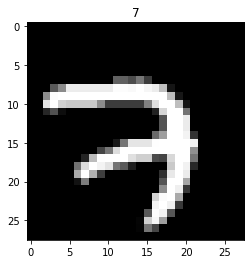

In [6]:
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0])); plt.show()

#Graph of execution

In [0]:
tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
image = tf.reshape(tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10]) 

In [0]:
conv1 = tf.layers.conv2d(   # shape (28, 28, 1)
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)      # -> (28, 28, 16)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2,
)           # -> (14, 14, 16)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # -> (14, 14, 32)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # -> (7, 7, 32)
flat = tf.reshape(pool2, [-1, 7*7*32])          # -> (7*7*32, )
output = tf.layers.dense(flat, 10)  


In [0]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

In [0]:
accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

In [0]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)  

In [16]:
for step in range(600):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_, flat_representation = sess.run([accuracy, flat], {tf_x: test_x, tf_y: test_y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

test_output = sess.run(output, {tf_x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

Step: 0 | train loss: 2.2858 | test accuracy: 0.17
Step: 50 | train loss: 0.5606 | test accuracy: 0.49
Step: 100 | train loss: 0.2875 | test accuracy: 0.62
Step: 150 | train loss: 0.1069 | test accuracy: 0.69
Step: 200 | train loss: 0.0593 | test accuracy: 0.74
Step: 250 | train loss: 0.1741 | test accuracy: 0.77
Step: 300 | train loss: 0.0992 | test accuracy: 0.80
Step: 350 | train loss: 0.1140 | test accuracy: 0.82
Step: 400 | train loss: 0.3941 | test accuracy: 0.83
Step: 450 | train loss: 0.0794 | test accuracy: 0.84
Step: 500 | train loss: 0.0260 | test accuracy: 0.86
Step: 550 | train loss: 0.0865 | test accuracy: 0.86
[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
